<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyzing-Data-from-NAI-Basileus'-Generation-Setting-Experiment" data-toc-modified-id="Analyzing-Data-from-NAI-Basileus'-Generation-Setting-Experiment-1">Analyzing Data from NAI Basileus' Generation Setting Experiment</a></span><ul class="toc-item"><li><span><a href="#Variables-in-the-dataset" data-toc-modified-id="Variables-in-the-dataset-1.1">Variables in the dataset</a></span></li><li><span><a href="#Information-on-Readability-Grade" data-toc-modified-id="Information-on-Readability-Grade-1.2">Information on Readability Grade</a></span></li><li><span><a href="#Reading-in-the-data" data-toc-modified-id="Reading-in-the-data-1.3">Reading in the data</a></span></li><li><span><a href="#Visual-data-inspection" data-toc-modified-id="Visual-data-inspection-1.4">Visual data inspection</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-target-variables" data-toc-modified-id="Distribution-of-target-variables-1.4.1">Distribution of target variables</a></span></li><li><span><a href="#Relationships-between-variables" data-toc-modified-id="Relationships-between-variables-1.4.2">Relationships between variables</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-1.5">Correlations</a></span></li><li><span><a href="#Regression-Analysis" data-toc-modified-id="Regression-Analysis-1.6">Regression Analysis</a></span><ul class="toc-item"><li><span><a href="#Randomness-predicting-Grammar/Style/Spelling" data-toc-modified-id="Randomness-predicting-Grammar/Style/Spelling-1.6.1">Randomness predicting Grammar/Style/Spelling</a></span></li><li><span><a href="#Randomness-predicting-Readability-Grade" data-toc-modified-id="Randomness-predicting-Readability-Grade-1.6.2">Randomness predicting Readability Grade</a></span><ul class="toc-item"><li><span><a href="#Regression-diagnostics-(checking-assumptions)" data-toc-modified-id="Regression-diagnostics-(checking-assumptions)-1.6.2.1">Regression diagnostics (checking assumptions)</a></span></li></ul></li><li><span><a href="#Presentation-of-Regression" data-toc-modified-id="Presentation-of-Regression-1.6.3">Presentation of Regression</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-relationships" data-toc-modified-id="Plotting-the-relationships-1.6.3.1">Plotting the relationships</a></span></li></ul></li><li><span><a href="#Randomness-predicting-Glue-Index" data-toc-modified-id="Randomness-predicting-Glue-Index-1.6.4">Randomness predicting Glue Index</a></span></li><li><span><a href="#Randomness-predicting-Goals" data-toc-modified-id="Randomness-predicting-Goals-1.6.5">Randomness predicting Goals</a></span></li></ul></li></ul></li><li><span><a href="#Recommendations-for-certain-target-readability-grades" data-toc-modified-id="Recommendations-for-certain-target-readability-grades-2">Recommendations for certain target readability grades</a></span></li></ul></div>

# Analyzing Data from NAI Basileus' Generation Setting Experiment

This project has come together as a community effort of users in the official discord channel of [Novel AI (NAI)](https://novelai.net/). Novel AI uses [transformer models](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)) that serve as "interactive AI storyteller". Discord user Basileus developed the idea to rate model outputs for their readability (i.e. text complexity) at various settings of the model.

Initial data collection varied only what NAI calls "randomness" (more commonly called temperature for transformers - [this blog post](https://huggingface.co/blog/how-to-generate) using constant sampling settings of Top-K Sampling: 140 and Nucleus sampling: 0.9. While data collection was still ongoing, interest about [Tail-Free Sampling (TFS)](https://trentbrick.github.io/Tail-Free-Sampling/) and its possible interaction with randomness grew so further data was collected, varying temperature and TFS settings.

This data was rated using [ProWritingAid](https://prowritingaid.com/) on several automated ratings for text complexity and quality. For readability the [Flesch-Kincaid grade level](https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests#Flesch%E2%80%93Kincaid_grade_level) was used. Explanations for other measures is provided below.

Data can be obtained [here](https://docs.google.com/spreadsheets/d/1a-oHJdBUvwTUam7Y9U9vqEvrcd4fK2q3oqm3H4iI4G0/edit#gid=116999801)

*Note that data collection for this project is still ongoing so this project is still work in progress!*

## Variables in the dataset

Variable|Meaning|Target
-|-|-
Randomness|Generator Setting|Independent Variable
Tail-Free|Generator Setting|Independent Variable
Grammar/Style/Spelling|Your writing can have no spelling or grammar mistakes but still be awkward, clumsy, and hard to read. Style can make your writing easier and more enjoyable to read. Style covers issues like repeated sentence starts, clunky word order and phrasing, hidden verbs, and more.|Higher is better
Readability Grade|A readability score is a measure of how easy your text is to read. Your readability score shows what grade level of students could understand and engage with your writing. For instance, a score of 7 means that seventh-grade students could read your work.|Lower is better
Glue Index|Glue words are words that are common, low-quality, or nondescript, and too many of them can make your sentences "sticky". Sticky sentences slow your reader down; try to avoid them.|Lower is better

## Information on Readability Grade
Data conclusions are still ongoing, so conclusions at this point are  tentative. However, given the data so far readability seems to be emerging as the most interesting target variable that can be influenced by generator settings.

Information on readability grade (provided by Basileus):
Best-selling fiction is in the range of 4-9 on Readability Grade (Randomness 0.55-0.85, TFS 0.6-0.65)

**Readability Grade 8-9: "Complex"** *(James Patterson, F. Scott Fitzgerald, Leo Tolstoy)*: relatively complex language, variety in word choice; can sometimes be abstruse\
**Readability Grade 7: "Poetic"** *(J.R.R. Tolkien, Dan Brown, Thomas Pynchon)*: enough complexity to have clever turns of phrase, without having to stop and think/reread\
**Readability Grade 6: "Casual"** *(Hunter S. Thompson, Steven King, Stephanie Meyer)*: flows well, easy to read large quantities of without getting tired\
**Readability Grade 4-5: "Punchy"** *(Ernest Hemingway, Cormac McCarthy, Susan Collins)*: concise, punchy language with straightforward sentence structure and word choice

## Reading in the data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import re
from sklearn.preprocessing import PolynomialFeatures as polyfeat
from sklearn.linear_model import LinearRegression as linreg
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_validate, KFold
import statsmodels.formula.api as smf

# Read in data of the GSheet document
nai_rand_only = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1a-oHJdBUvwTUam7Y9U9vqEvrcd4fK2q3oqm3H4iI4G0/export?format=csv&gid=1831608934', header=1)

nai_rand_tfs = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1a-oHJdBUvwTUam7Y9U9vqEvrcd4fK2q3oqm3H4iI4G0/export?format=csv&gid=832120712', header=1)

print("First 3 lines of nai_rand_only:\n")
print(nai_rand_only.iloc[:, :15].head(3))
print(nai_rand_only.iloc[:, 15:].head(3))


print("\nFirst 3 lines of nai_rand_tfs:\n")
print(nai_rand_tfs.head(3))

First 3 lines of nai_rand_only:

   Randomness  Max Length  Min Length  Top-K  Nucleus Tail-Free  Penalty  \
0         0.6          40          20     60      0.9  disabled      2.8   
1         0.6          40          20     60      0.9  disabled      2.8   
2         0.6          40          20     60      0.9  disabled      2.8   

   Range  Slope                                                Raw  Goals  \
0    512   3.33  The colony's central courtyard was a vast expa...    NaN   
1    512   3.33  The hallways were empty save for a few people ...    NaN   
2    512   3.33  The corridor outside the dormitory was narrow,...    NaN   

   Improvements Grammar/Style/Spelling  Sentence Length  Readability Grade  
0           NaN                    74%              NaN                  5  
1           NaN                    77%              NaN                  5  
2           NaN                    65%              NaN                  6  
   Sentence Variety  Passive Voice  Complex P

In [2]:
# nai_rand_only has a few instances of the double quote bug. These have been removed for nai_rand_tfs since they tank some rating scores.
# To keep things consistent, we will remove them for nai_rand_only as well
mask = nai_rand_only["Raw"].str.contains('\S"\S', regex=True)
nai_rand_only = nai_rand_only[~mask]

In [3]:
# Combine datasets
nai = nai_rand_only.append(nai_rand_tfs)
nai.reset_index(inplace=True)

print("\nFirst three lines of data:\n")
print(nai.iloc[:, :15].head(3))
print(nai.iloc[:, 15:].head(3))

print("\nLast three lines of data:\n")
print(nai.iloc[:, :15].tail(3))
print(nai.iloc[:, 15:].tail(3))


First three lines of data:

   index  Randomness  Max Length  Min Length  Top-K  Nucleus Tail-Free  \
0      0         0.6        40.0        20.0   60.0      0.9  disabled   
1      1         0.6        40.0        20.0   60.0      0.9  disabled   
2      2         0.6        40.0        20.0   60.0      0.9  disabled   

   Penalty  Range  Slope                                                Raw  \
0      2.8  512.0   3.33  The colony's central courtyard was a vast expa...   
1      2.8  512.0   3.33  The hallways were empty save for a few people ...   
2      2.8  512.0   3.33  The corridor outside the dormitory was narrow,...   

  Goals  Improvements Grammar/Style/Spelling  Sentence Length  
0   NaN           NaN                    74%              NaN  
1   NaN           NaN                    77%              NaN  
2   NaN           NaN                    65%              NaN  
   Readability Grade  Sentence Variety  Passive Voice  Complex Paragraphs  \
0                  5    

In [4]:
# drop columns without data (and data without variance)
nai = nai[["Randomness", "Tail-Free", "Nucleus",
           "Grammar/Style/Spelling", "Readability Grade", "Glue Index", "Goals",
           "Raw"]]

print("\nFirst three lines of data:\n")
print(nai.iloc[:, :15].head(3))
print(nai.iloc[:, 15:].head(3))

print("\nLast three lines of data:\n")
print(nai.iloc[:, :15].tail(3))
print(nai.iloc[:, 15:].tail(3))


First three lines of data:

   Randomness Tail-Free  Nucleus Grammar/Style/Spelling  Readability Grade  \
0         0.6  disabled      0.9                    74%                  5   
1         0.6  disabled      0.9                    77%                  5   
2         0.6  disabled      0.9                    65%                  6   

  Glue Index Goals                                                Raw  
0        44%   NaN  The colony's central courtyard was a vast expa...  
1        47%   NaN  The hallways were empty save for a few people ...  
2        46%   NaN  The corridor outside the dormitory was narrow,...  
Empty DataFrame
Columns: []
Index: [0, 1, 2]

Last three lines of data:

     Randomness Tail-Free  Nucleus Grammar/Style/Spelling  Readability Grade  \
487         0.9       0.9      NaN                    73%                 10   
488         0.9       0.9      NaN                    77%                  9   
489         0.9       0.9      NaN                    83%

In [5]:
# Convert "disabled" for tail free to "1"
nai["Tail-Free"] = nai["Tail-Free"].replace({"disabled": "1"}).astype(float)

# Convert NaN for Nucelus to "1"
nai["Nucleus"].fillna(1, inplace=True)

# Convert % strings to float
nai[["Grammar/Style/Spelling", "Glue Index", "Goals"]] = nai[["Grammar/Style/Spelling",
                                                              "Glue Index", "Goals"]].astype(str).replace({"\%": ""}, regex=True).astype(float)

print("\nFirst three lines of data:\n")
print(nai.iloc[:, :15].head(3))
print(nai.iloc[:, 15:].head(3))

print("\nLast three lines of data:\n")
print(nai.iloc[:, :15].tail(3))
print(nai.iloc[:, 15:].tail(3))

nai.info()


First three lines of data:

   Randomness  Tail-Free  Nucleus  Grammar/Style/Spelling  Readability Grade  \
0         0.6        1.0      0.9                    74.0                  5   
1         0.6        1.0      0.9                    77.0                  5   
2         0.6        1.0      0.9                    65.0                  6   

   Glue Index  Goals                                                Raw  
0        44.0    NaN  The colony's central courtyard was a vast expa...  
1        47.0    NaN  The hallways were empty save for a few people ...  
2        46.0    NaN  The corridor outside the dormitory was narrow,...  
Empty DataFrame
Columns: []
Index: [0, 1, 2]

Last three lines of data:

     Randomness  Tail-Free  Nucleus  Grammar/Style/Spelling  \
487         0.9        0.9      1.0                    73.0   
488         0.9        0.9      1.0                    77.0   
489         0.9        0.9      1.0                    83.0   

     Readability Grade  Glue

In [6]:
# save the data for people who want to use R Studio or similar

nai.to_csv("NAI_generation_setting_exp.csv")

## Visual data inspection

### Distribution of target variables

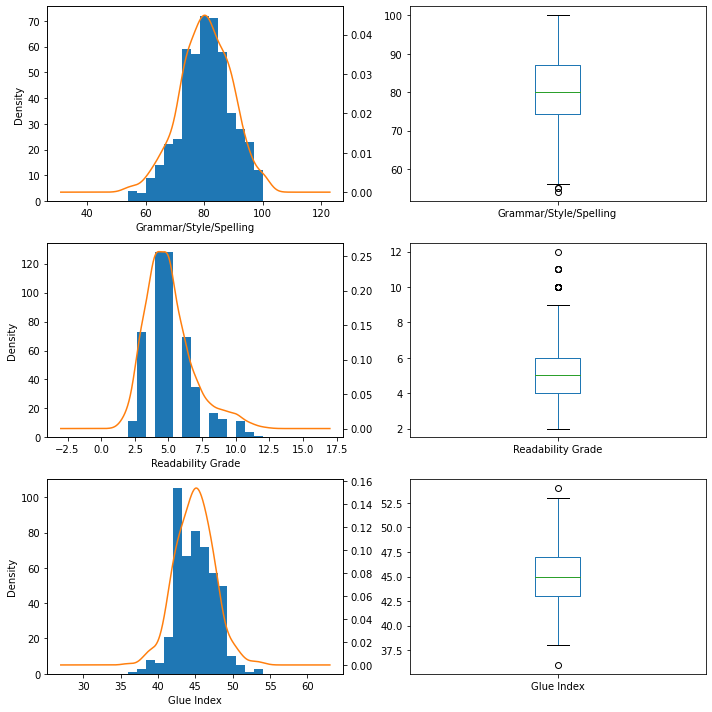

In [7]:
%matplotlib inline

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Histograms with KDE
ax1 = nai["Grammar/Style/Spelling"].plot.hist(ax=axes[0, 0], bins=15)
ax1.set_xlabel("Grammar/Style/Spelling")
nai["Grammar/Style/Spelling"].plot.kde(ax=axes[0, 0], secondary_y=True)

ax2 = nai["Readability Grade"].plot.hist(ax=axes[1, 0], bins=15)
ax2.set_xlabel("Readability Grade")
nai["Readability Grade"].plot.kde(ax=axes[1, 0], secondary_y=True)

ax3 = nai["Glue Index"].plot.hist(ax=axes[2, 0], bins=15)
nai["Glue Index"].plot.kde(ax=axes[2, 0], secondary_y=True)
ax3.set_xlabel("Glue Index")


# Boxplots
nai["Grammar/Style/Spelling"].plot.box(ax=axes[0, 1])
nai["Readability Grade"].plot.box(ax=axes[1, 1])
nai["Glue Index"].plot.box(ax=axes[2, 1])

fig.tight_layout()
plt.show()

We have a few minor outliers, but nothing too much out of the ordinary that sticks out. I also would be hesitant to remove any outlier for analysis, since we in this case we can be sure, that all data points are truly part of the "population" (i.e. all potential outputs that we could have gotten with the respective setting).

### Relationships between variables

A few scatter plot with lowess lines to see if we are dealing with linear relationships. I'd actually expect something more like a curvilinear relationship.

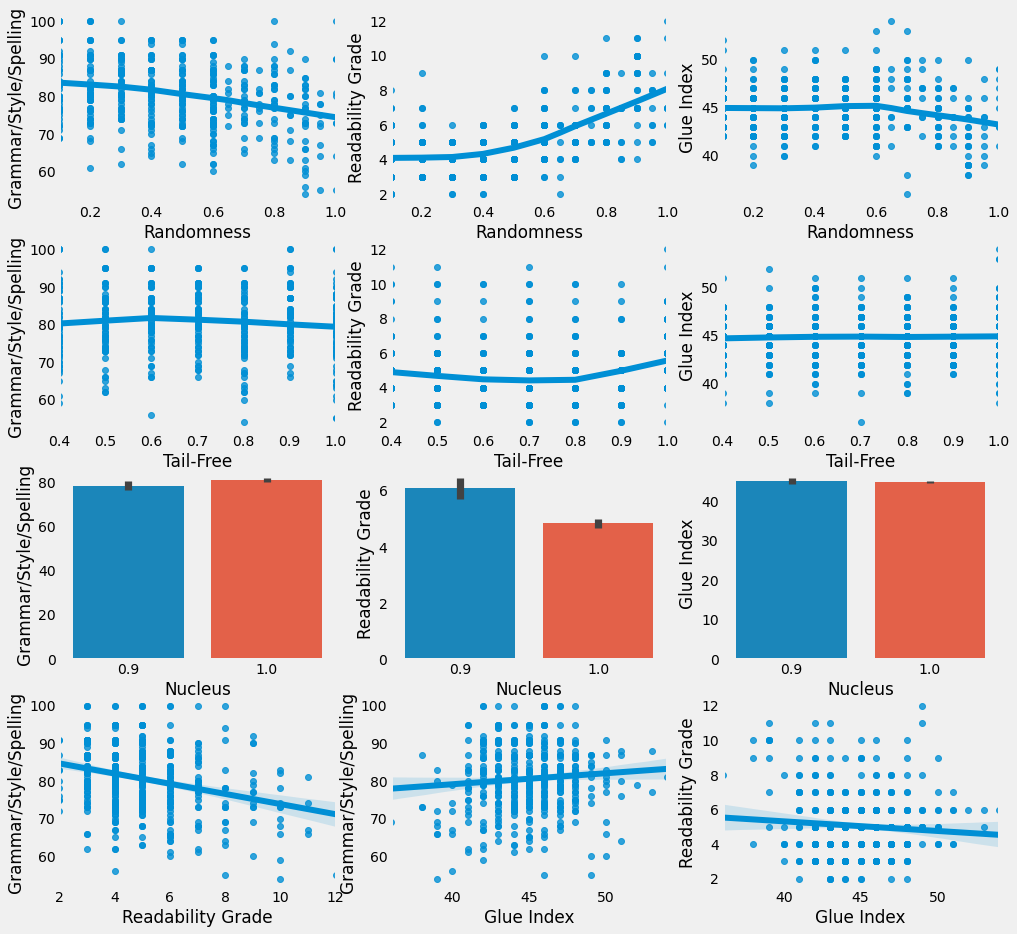

In [8]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(4, 3, figsize=(15, 15))
plt.grid(False)
# Relationship with Randomness
sns.regplot(data=nai, y="Grammar/Style/Spelling",
            x="Randomness", lowess=True, ax=axes[0, 0])
sns.regplot(data=nai, y="Readability Grade",
            x="Randomness", lowess=True, ax=axes[0, 1])
sns.regplot(data=nai, y="Glue Index", x="Randomness",
            lowess=True, ax=axes[0, 2])
# Relationships with TFS
sns.regplot(data=nai, y="Grammar/Style/Spelling",
            x="Tail-Free", lowess=True, ax=axes[1, 0])
sns.regplot(data=nai, y="Readability Grade",
            x="Tail-Free", lowess=True, ax=axes[1, 1])
sns.regplot(data=nai, y="Glue Index", x="Tail-Free",
            lowess=True, ax=axes[1, 2])
# Relationships with Nucleus (not much here yet since only 0.9 or 1.0)
sns.barplot(data=nai, y="Grammar/Style/Spelling",
            x="Nucleus", ax=axes[2, 0])
sns.barplot(data=nai, y="Readability Grade",
            x="Nucleus", ax=axes[2, 1])
sns.barplot(data=nai, y="Glue Index", x="Nucleus",
            ax=axes[2, 2])
# Relationships between dependent vars
sns.regplot(data=nai, y="Grammar/Style/Spelling",
            x="Readability Grade", lowess=False, ax=axes[3, 0])
sns.regplot(data=nai, y="Grammar/Style/Spelling",
            x="Glue Index", lowess=False, ax=axes[3, 1])
sns.regplot(data=nai, y="Readability Grade",
            x="Glue Index", lowess=False, ax=axes[3, 2])

for ax in fig.axes:
    ax.grid(False)

plt.show()

**(The following bit is outdated and only applies to randomness data without tail-free sampling. I will revise this once we have all the data)**
The relationship with Grammar/Style/Spelling looks like a weak quadratic relationship ("reverse U"), with Readability it looks a little bit cubic (but a linear relationship might be a decent enough fit with less danger of overfitting), and Glue Index might be *more or less* quadratic.

There seems to be not much reliable relationship of any kind between the target variables (will still be looking at correlations below), so a MANOVA (which depends on a linear combination of the dependent variables) is probably out of the question.

## Correlations

In [9]:
nai[["Randomness", "Tail-Free", "Nucleus", "Grammar/Style/Spelling",
     "Readability Grade", "Glue Index", "Goals"]].corr()

,Randomness,Tail-Free,Nucleus,Grammar/Style/Spelling,Readability Grade,Glue Index,Goals
Randomness,1.000000,0.360888,-0.567128,-0.311397,0.605154,-0.115447,-0.350189
Tail-Free,0.360888,1.000000,-0.635040,-0.071734,0.087659,0.040650,0.049487
Nucleus,-0.567128,-0.635040,1.000000,0.112987,-0.257276,-0.038521,NaN
Grammar/Style/Spelling,-0.311397,-0.071734,0.112987,1.000000,-0.277965,0.086892,0.353878
Readability Grade,0.605154,0.087659,-0.257276,-0.277965,1.000000,-0.080366,-0.383404
Glue Index,-0.115447,0.040650,-0.038521,0.086892,-0.080366,1.000000,0.185447
Goals,-0.350189,0.049487,NaN,0.353878,-0.383404,0.185447,1.000000


**(The following bit is outdated and only applies to random without tail-free sampling. I will revise this once we have all the data)**
Best to ignore the results for correlations Randomness <-> Grammar/Style/Spelling and Randomness <-> Glue Index, since the relationship clearly is non-linear.

Otherwise:
* Strong negative linear relations between Readability and Randomness (lower is better for readability) so: the higher the randomness, the worse readability tends to be)
* The 3 target variables really have weak to none linear relationships with each other

## Regression Analysis

In [10]:
# Drop rows without values for the dependent vars, can be deleted later if all the data is in
nai.dropna(subset=["Grammar/Style/Spelling",
                   "Readability Grade", "Glue Index"], inplace=True)

In [11]:
# Setting up k-fold cross validation

kf = KFold(10, shuffle=True, random_state=42)

# Defining predictors for models
nai["Rand_cent"] = nai["Randomness"].apply(
    lambda x: x-nai["Randomness"].mean())  # centering
nai["TFS_cent"] = nai["Tail-Free"].apply(lambda x: x-nai["Tail-Free"].mean())
nai["Nuc_cent"] = nai["Nucleus"].apply(lambda x: x-nai["Nucleus"].mean())
predictors = nai[["Rand_cent", "TFS_cent", "Nuc_cent"]]
pred_names = predictors.columns

# to include interaction
poly_lin = polyfeat(interaction_only=True, include_bias=False)
lin_predictors = poly_lin.fit_transform(predictors)
poly_quad = polyfeat(degree=2, include_bias=False)
quad_predictors = poly_quad.fit_transform(predictors)
poly_cub = polyfeat(degree=3, include_bias=False)
cub_predictors = poly_cub.fit_transform(predictors)
poly_quart = polyfeat(degree=4, include_bias=False)
quart_predictors = poly_quart.fit_transform(predictors)
# poly_quint = polyfeat(degree=5, include_bias=False)
# quint_predictors = poly_quint.fit_transform(predictors)

# Display created feature names
print("Linear features:")
print(poly_lin.get_feature_names(pred_names))
print("\nQuadratic features:")
print(poly_quad.get_feature_names(pred_names))
print("\nCubic features:")
print(poly_cub.get_feature_names(pred_names))
print("\nQuartic features:")
print(poly_quart.get_feature_names(pred_names))
# print("\nQuintic features:")
# print(poly_quint.get_feature_names(predictors.columns))

Linear features:
['Rand_cent', 'TFS_cent', 'Nuc_cent', 'Rand_cent TFS_cent', 'Rand_cent Nuc_cent', 'TFS_cent Nuc_cent']

Quadratic features:
['Rand_cent', 'TFS_cent', 'Nuc_cent', 'Rand_cent^2', 'Rand_cent TFS_cent', 'Rand_cent Nuc_cent', 'TFS_cent^2', 'TFS_cent Nuc_cent', 'Nuc_cent^2']

Cubic features:
['Rand_cent', 'TFS_cent', 'Nuc_cent', 'Rand_cent^2', 'Rand_cent TFS_cent', 'Rand_cent Nuc_cent', 'TFS_cent^2', 'TFS_cent Nuc_cent', 'Nuc_cent^2', 'Rand_cent^3', 'Rand_cent^2 TFS_cent', 'Rand_cent^2 Nuc_cent', 'Rand_cent TFS_cent^2', 'Rand_cent TFS_cent Nuc_cent', 'Rand_cent Nuc_cent^2', 'TFS_cent^3', 'TFS_cent^2 Nuc_cent', 'TFS_cent Nuc_cent^2', 'Nuc_cent^3']

Quartic features:
['Rand_cent', 'TFS_cent', 'Nuc_cent', 'Rand_cent^2', 'Rand_cent TFS_cent', 'Rand_cent Nuc_cent', 'TFS_cent^2', 'TFS_cent Nuc_cent', 'Nuc_cent^2', 'Rand_cent^3', 'Rand_cent^2 TFS_cent', 'Rand_cent^2 Nuc_cent', 'Rand_cent TFS_cent^2', 'Rand_cent TFS_cent Nuc_cent', 'Rand_cent Nuc_cent^2', 'TFS_cent^3', 'TFS_cent^2 N

In [12]:
# We do not need interactions between TFS x Nucleus, so we are removing those
# Also removing poly terms for Nucleus (should be kept once we have more data for Nucleus)

remove_regex_li = ["Nuc_cent\^", "TFS_cent(?:\^\d)? Nuc_cent"]

def remove_terms(poly_polyfeat, pred_names_li, pred_array, terms_regex_li):
    feature_names = poly_polyfeat.get_feature_names(pred_names_li)
    indexes_to_remove = []
    for regex in terms_regex_li:
        current_indexes = [i for i, item in enumerate(
            feature_names) if re.search(regex, item)]
        indexes_to_remove = indexes_to_remove + current_indexes
    indexes_to_remove = np.unique(indexes_to_remove)
    new_pred_array = np.delete(pred_array, np.s_[indexes_to_remove], axis=1)
    return new_pred_array

lin_predictors = remove_terms(
    poly_lin, pred_names, lin_predictors, remove_regex_li)
quad_predictors = remove_terms(
    poly_quad, pred_names, quad_predictors, remove_regex_li)
cub_predictors = remove_terms(
    poly_cub, pred_names, cub_predictors, remove_regex_li)
quart_predictors = remove_terms(
    poly_quart, pred_names, quart_predictors, remove_regex_li)

In [13]:
# setup scikit linear model
lin_model = linreg()

# setup list of model names with predictor arrays
predictor_li = [("linear", lin_predictors), ("quadratic", quad_predictors),
                ("cubic", cub_predictors), ("quartic", quart_predictors)]
# predictor_li = [("linear", lin_predictors), ("quadratic", quad_predictors),
#                 ("cubic", cub_predictors), ("quartic", quart_predictors), ("quintic", quint_predictors)]

### Randomness predicting Grammar/Style/Spelling

In [14]:
# Select best model
for pred in predictor_li:
    current_pred = pred[1]
    current_model_name = pred[0]
    cross_val = cross_validate(lin_model, current_pred, nai["Grammar/Style/Spelling"],
                               scoring=["neg_mean_squared_error", "r2"], cv=kf)
    neg_mses = cross_val["test_neg_mean_squared_error"]
    r_squares = cross_val["test_r2"]
    avg_rmse = np.mean((neg_mses*-1)**0.5)
    avg_r_sq = np.mean(r_squares)
    print("Model performance for {} model predicting Grammar/Style/Spelling:".format(current_model_name))
    print("r-square: {:.4f}    RMSE: {:.2f}\n".format(avg_r_sq, avg_rmse))

Model performance for linear model predicting Grammar/Style/Spelling:
r-square: 0.0581    RMSE: 8.27

Model performance for quadratic model predicting Grammar/Style/Spelling:
r-square: 0.0575    RMSE: 8.26

Model performance for cubic model predicting Grammar/Style/Spelling:
r-square: 0.0442    RMSE: 8.33

Model performance for quartic model predicting Grammar/Style/Spelling:
r-square: 0.0393    RMSE: 8.36



These model performances are all so terrible, that I would not bother to investigate further - there might be a *very small* relationship here (our sample is quite big), but it is too small to really matter in practice

### Randomness predicting Readability Grade

In [15]:
# Select best model
for pred in predictor_li:
    current_pred = pred[1]
    current_model_name = pred[0]
    cross_val = cross_validate(lin_model, current_pred, nai["Readability Grade"],
                               scoring=["neg_mean_squared_error", "r2"], cv=kf)
    neg_mses = cross_val["test_neg_mean_squared_error"]
    r_squares = cross_val["test_r2"]
    avg_rmse = np.mean((neg_mses*-1)**0.5)
    avg_r_sq = np.mean(r_squares)
    print("Model performance for {} model predicting Readability:".format(
        current_model_name))
    print("r-square: {:.4f}    RMSE: {:.2f}\n".format(avg_r_sq, avg_rmse))

Model performance for linear model predicting Readability:
r-square: 0.3527    RMSE: 1.39

Model performance for quadratic model predicting Readability:
r-square: 0.4781    RMSE: 1.24

Model performance for cubic model predicting Readability:
r-square: 0.4800    RMSE: 1.24

Model performance for quartic model predicting Readability:
r-square: 0.4711    RMSE: 1.25



This looks more promising, continuing with cubic model.

#### Regression diagnostics (checking assumptions)

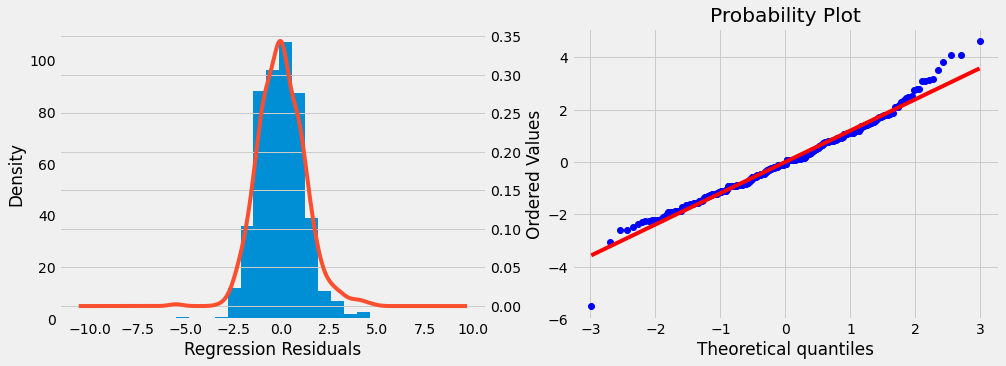

In [16]:
# Fit model and save residuals
lin_model.fit(cub_predictors, nai["Readability Grade"])

pred = lin_model.predict(cub_predictors)
obs_pred_res_df = pd.DataFrame(
    {'Actual': nai["Readability Grade"], 'Predicted': pred})
obs_pred_res_df["Residuals"] = obs_pred_res_df['Actual'] - \
    obs_pred_res_df['Predicted']

# Check for normal distribution of residuals with histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograms with KDE
ax1 = obs_pred_res_df["Residuals"].plot.hist(ax=axes[0], bins=15)
ax1.set_xlabel("Regression Residuals")
obs_pred_res_df["Residuals"].plot.kde(ax=axes[0], secondary_y=True)
# Q-Q Plot
stats.probplot(obs_pred_res_df["Residuals"], dist="norm", plot=axes[1])
plt.show()

Residuals are (approximately) normally distributed.

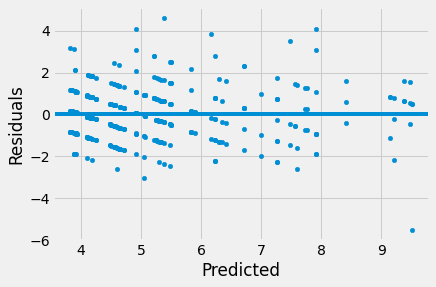

In [17]:
# Checking for Homoscedasticity

plot = obs_pred_res_df.plot.scatter(x="Predicted", y="Residuals")
#horiz_line_data = np.array([40 for i in xrange(len(xs))])
plt.axhline(y=0, linestyle='-')
plt.show()

Residuals seem close enough to homoscedacity - looks like assumptions for a linear regression hold!

### Presentation of Regression

In [18]:
import statsmodels.api as sm

model = smf.ols(
    data=nai, formula="Q('Readability Grade') ~ \
    Rand_cent + I(Rand_cent**2) + I(Rand_cent**3) + \
    TFS_cent + I(TFS_cent**2) + I(TFS_cent**3) + \
    Nuc_cent + \
    Rand_cent:TFS_cent + \
    I(Rand_cent**2):TFS_cent + Rand_cent:I(TFS_cent**2) + \
    Rand_cent:Nuc_cent + \
    I(Rand_cent**2):Nuc_cent")

# the names for the predictors are getting tedious to read, so setting up custom names
x_names = ["Intercept",
           "Randomness", "Randomness**2", "Randomness**3",
           "TF-Sampling", "TF-Sampling**2", "TF-Sampling**3",
           "Nucleus Sampling",
           "Randomness x TF-Sampling",
           "Randomness**2 x TF-Sampling", "Randomness x TF-Sampling**2",
           "Randomness x Nucleus Sampling",
           "Randomness**2 x Nucleus Sampling"]

res = model.fit()
print("Cubic Model Predicting Readability with CENTERED (!) Predcitors\n")
# print(res.summary())
print(res.summary(xname=x_names))

Cubic Model Predicting Readability with CENTERED (!) Predcitors

                              OLS Regression Results                              
Dep. Variable:     Q('Readability Grade')   R-squared:                       0.545
Model:                                OLS   Adj. R-squared:                  0.533
Method:                     Least Squares   F-statistic:                     47.56
Date:                    Wed, 07 Jul 2021   Prob (F-statistic):           1.06e-73
Time:                            18:19:04   Log-Likelihood:                -785.61
No. Observations:                     490   AIC:                             1597.
Df Residuals:                         477   BIC:                             1652.
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----

**THIS IS ALSO OUTDATED WILL BE UPDATED LATER**

The randomness settings explains a whooping 30% of the variation of the Readability Grade. 

Remember, that the readability represents "what grade level of students could understand and engage with your writing. For instance, a score of 7 means that seventh-grade students could read your work.". 

A *lower* readability score is thus better (although arguably if it gets *too* low, the style might become a bit "primitive"? The formula for the expected readability *with everything on default setting* is:

Readability Grade = 0.34 + (7.1 * Randomness Setting)

#### Plotting the relationships
For now, I will be plotting a line with predicted values for TFS = 1 (no sampling), 0.9, 0.8, 0.7, 0.6, 0.5) and randomness values with 0.05 steps (but it should stay in the range we have data for)

In [19]:
tfs_plot_values = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4]
rand_plot_values = np.arange(0.1, 1.0, 0.05)
nucleus_plot_values = [1, 0.9]  # not used for now

# Construct dataframe with values to predict (all in one graph)
pred_df = pd.DataFrame()

for tfs_val in tfs_plot_values:
    # The regression used centered values so we need to transform tfs_val as well
    tfs_val_cent = tfs_val - nai["Tail-Free"].mean()
    # When tfs is off (1), graph for nucleus sampling = 0.9
    if tfs_val == 1:
        nucleus_val = 0.9
    else:
        nucleus_val = 1
    nuc_val_cent = 0.9 - nai["Nucleus"].mean()

    # determine range of data for current Nucleus
    mask = (nai["Nucleus"] == nucleus_val) & (nai["Tail-Free"] == tfs_val)
    rand_min = nai[mask]["Randomness"].min()
    rand_max = nai[mask]["Randomness"].max()

    current_rand_range = np.arange(rand_min, rand_max+0.05, 0.05)
    current_rand_range_cent = current_rand_range - nai["Randomness"].mean()

    current_pred_df = pd.DataFrame(
        {"const": 1, "Randomness": current_rand_range, "Tail-Free Sampling": tfs_val, "Nucleus": nucleus_val,
         "Rand_cent": current_rand_range_cent, "TFS_cent": tfs_val_cent, "Nuc_cent": nuc_val_cent})
    pred_df = pred_df.append(current_pred_df, ignore_index=True)

# Add predicted readability to table constructed above
pred_df["Predicted Readbility"] = res.predict(
    pred_df[["const", "Rand_cent", "TFS_cent", "Nuc_cent"]])

# replace Tail-Free Sampling 1 with "No TFS (NS = 0.9)"
pred_df["Tail-Free Sampling"].replace(1, "No TFS (NS = 0.9)", inplace=True)

print(pred_df[["Randomness", "Tail-Free Sampling",
               "Nucleus", "Predicted Readbility"]].head(10))

# The following is only needed if it turns out we want to graph a main effect for TFS
# # Dataframe for displaying main effect of TFS only
# tfs_only_plot_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]

# pred_tfs_only_df = pd.DataFrame()

# for tfs_val in tfs_only_plot_values:
#     # The regression used centered values so we need to transform tfs_val as well
#     tfs_val_cent = tfs_val - nai["Tail-Free"].mean()
#     # Only plotting for tfs so nucleus is off (=1)
#     nuc_val_cent = 1 - nai["Nucleus"].mean()
#     # Plot for average randomness
#     rand_val_cent = 0

#     current_pred_dict = (
#         {"const": 1, "Tail-Free Sampling": tfs_val,
#          "Rand_cent": rand_val_cent, "TFS_cent": tfs_val_cent, "Nuc_cent": nuc_val_cent})
#     pred_tfs_only_df = pred_tfs_only_df.append(
#         current_pred_dict, ignore_index=True)

# # Add predicted readability to table constructed above
# pred_tfs_only_df["Predicted Readbility"] = res.predict(
#     pred_tfs_only_df[["const", "Rand_cent", "TFS_cent", "Nuc_cent"]])

# print(pred_tfs_only_df[["Tail-Free Sampling",
#                         "Predicted Readbility"]].head(10))

   Randomness Tail-Free Sampling  Nucleus  Predicted Readbility
0        0.60  No TFS (NS = 0.9)      0.9              4.917838
1        0.65  No TFS (NS = 0.9)      0.9              5.051782
2        0.70  No TFS (NS = 0.9)      0.9              5.246192
3        0.75  No TFS (NS = 0.9)      0.9              5.505230
4        0.80  No TFS (NS = 0.9)      0.9              5.833061
5        0.85  No TFS (NS = 0.9)      0.9              6.233851
6        0.90  No TFS (NS = 0.9)      0.9              6.711764
7        0.95  No TFS (NS = 0.9)      0.9              7.270964
8        1.00  No TFS (NS = 0.9)      0.9              7.915616
9        0.10                0.9      1.0              6.041205


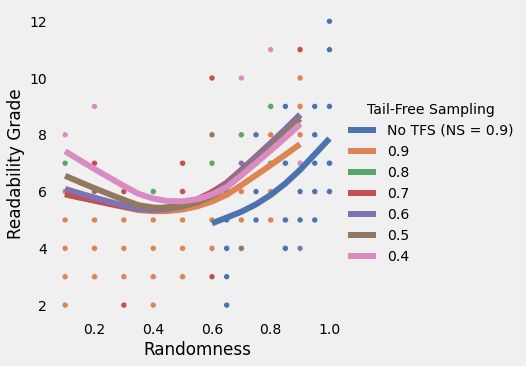

In [20]:
hue_order_lm = ["No TFS (NS = 0.9)", 0.9, 0.8, 0.7, 0.6, 0.5, 0.4]
hue_order_scatter = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4]

read_tfs_rand_plot = sns.lmplot(data=pred_df, y="Predicted Readbility",
                                x="Randomness", hue="Tail-Free Sampling", lowess=True, scatter=False, palette="deep", hue_order=hue_order_lm, legend_out=True)
read_tfs_rand_plot = sns.scatterplot(data=nai, y="Readability Grade", x="Randomness", hue="Tail-Free",
                                     palette="deep", legend=False, hue_order=hue_order_scatter)
plt.grid(False)
plt.xlim(0.05, 1.05)
plt.ylabel("Readability Grade")
plt.show()

read_tfs_rand_plot.figure.savefig(
    'Readability_TFS_Randomness.png', bbox_inches="tight")

# No longer used...
# fig = sm.graphics.plot_partregress_grid(res, exog_idx=[1, 2])
# fig.set_size_inches(10, 5)
# fig.tight_layout(pad=1.0)

# x_labels = ["Randomness", "Tail-Free"]

# for ax, x_label in zip(fig.get_axes(), x_labels):
#     ax.set_ylabel("Readability")
#     ax.set_xlabel(x_label)

In [21]:
# TFS main effect turns out to be not significant so no need to graph that relationship
# Still keeping the code here should I need it later after all

# avg_rand = nai["Randomness"].mean()
# title = "Impact of TFS on Complexity\n(plotted for randomness = {:.2f})".format(avg_rand)

# read_tfs_plot = sns.lmplot(data=pred_tfs_only_df, y="Predicted Readbility",
#            x="Tail-Free Sampling", lowess=True, scatter=False)

# mask = nai["Tail-Free"] < 1
# read_tfs_plot = sns.scatterplot(data=nai[mask], y="Readability Grade", x="Tail-Free", color = "blue")
# plt.grid(False)
# plt.ylabel("Readability Grade")
# plt.xlim(0.35,0.95)
# plt.title(title)
# plt.show()

# read_tfs_plot.figure.savefig('Readability_TFS.png')

### Randomness predicting Glue Index

In [22]:
# Select best model
for pred in predictor_li:
    current_pred = pred[1]
    current_model_name = pred[0]
    cross_val = cross_validate(lin_model, current_pred, nai["Glue Index"],
                               scoring=["neg_mean_squared_error", "r2"], cv=kf)
    neg_mses = cross_val["test_neg_mean_squared_error"]
    r_squares = cross_val["test_r2"]
    avg_rmse = np.mean((neg_mses*-1)**0.5)
    avg_r_sq = np.mean(r_squares)
    print("Model performance for {} model predicting Glue Index:".format(
        current_model_name))
    print("r-square: {:.4f}    RMSE: {:.2f}\n".format(avg_r_sq, avg_rmse))

Model performance for linear model predicting Glue Index:
r-square: -0.0403    RMSE: 2.56

Model performance for quadratic model predicting Glue Index:
r-square: -0.0001    RMSE: 2.51

Model performance for cubic model predicting Glue Index:
r-square: 0.0167    RMSE: 2.49

Model performance for quartic model predicting Glue Index:
r-square: 0.0197    RMSE: 2.48



### Randomness predicting Goals

I am somewhat skeptical of the "Goals" measure to be honest. It is a composite measure of the other target variables, and these are only weakly correlated. Will still see how a model predicting Goals cross-validates below, but do not expect too much from it.

In [23]:
# Goals is missing for nucleus sampling, 
# will just create a new df for this analysis without missing vals for goals
nai_goals = nai.dropna(subset=["Goals"])

# Setting up k-fold cross validation

kf = KFold(10, shuffle=True, random_state=42)

# Defining predictors for models
predictors = nai_goals[["Rand_cent", "TFS_cent", "Nuc_cent"]]
pred_names = predictors.columns

# to include interaction
poly_lin = polyfeat(interaction_only=True, include_bias=False)
lin_predictors = poly_lin.fit_transform(predictors)
poly_quad = polyfeat(degree=2, include_bias=False)
quad_predictors = poly_quad.fit_transform(predictors)
poly_cub = polyfeat(degree=3, include_bias=False)
cub_predictors = poly_cub.fit_transform(predictors)
poly_quart = polyfeat(degree=4, include_bias=False)
quart_predictors = poly_quart.fit_transform(predictors)
# poly_quint = polyfeat(degree=5, include_bias=False)
# quint_predictors = poly_quint.fit_transform(predictors)

lin_predictors = remove_terms(
    poly_lin, pred_names, lin_predictors, remove_regex_li)
quad_predictors = remove_terms(
    poly_quad, pred_names, quad_predictors, remove_regex_li)
cub_predictors = remove_terms(
    poly_cub, pred_names, cub_predictors, remove_regex_li)
quart_predictors = remove_terms(
    poly_quart, pred_names, quart_predictors, remove_regex_li)

# setup list of model names with predictor arrays
predictor_li = [("linear", lin_predictors), ("quadratic", quad_predictors),
                ("cubic", cub_predictors), ("quartic", quart_predictors)]

# Select best model
for pred in predictor_li:
    current_pred = pred[1]
    current_model_name = pred[0]
    cross_val = cross_validate(lin_model, current_pred, nai_goals["Goals"],
                               scoring=["neg_mean_squared_error", "r2"], cv=kf)
    neg_mses = cross_val["test_neg_mean_squared_error"]
    r_squares = cross_val["test_r2"]
    avg_rmse = np.mean((neg_mses*-1)**0.5)
    avg_r_sq = np.mean(r_squares)
    print("Model performance for {} model predicting Glue Index:".format(
        current_model_name))
    print("r-square: {:.4f}    RMSE: {:.2f}\n".format(avg_r_sq, avg_rmse))

Model performance for linear model predicting Glue Index:
r-square: 0.0295    RMSE: 8.53

Model performance for quadratic model predicting Glue Index:
r-square: 0.0642    RMSE: 8.37

Model performance for cubic model predicting Glue Index:
r-square: 0.0559    RMSE: 8.41

Model performance for quartic model predicting Glue Index:
r-square: 0.0569    RMSE: 8.41



More abysmal model performance - will not bother to investigate further... 

# Recommendations for certain target readability grades
Below I am taking a closer look at the ranges of Randomness and TFS for various levels of readability. I have condensed my findings into preliminary recommendations for users that can be found [here](https://justpaste.it/7zvmd).

In [24]:
# for TFS
mask_punch = (pred_df["Predicted Readbility"] >= 3.5) & (pred_df["Predicted Readbility"] <= 5.4) & (pred_df["Nucleus"] == 1)
mask_casual = (pred_df["Predicted Readbility"] >= 5.5) & (pred_df["Predicted Readbility"] <= 6.4) & (pred_df["Nucleus"] == 1)
mask_poetic = (pred_df["Predicted Readbility"] >= 6.5) & (pred_df["Predicted Readbility"] <= 7.4) & (pred_df["Nucleus"] == 1)
mask_complex = (pred_df["Predicted Readbility"] >= 7.5) & (pred_df["Predicted Readbility"] <= 9.4) & (pred_df["Nucleus"] == 1)
mask_mad = (pred_df["Predicted Readbility"] >= 9.5) & (pred_df["Nucleus"] == 1)

print("PUNCHY (3.5-5.4):\n")
print(pred_df[mask_punch][["Randomness", "Tail-Free Sampling",
               "Nucleus", "Predicted Readbility"]].sort_values("Predicted Readbility"))
pred_df[mask_punch][["Randomness", "Tail-Free Sampling"]].value_counts().sort_index(level=0)

print("\nCASUAL (5.5-6.4):\n")
print(pred_df[mask_casual][["Randomness", "Tail-Free Sampling",
               "Nucleus", "Predicted Readbility"]].sort_values("Predicted Readbility"))
print(pred_df[mask_casual][["Randomness", "Tail-Free Sampling"]].value_counts().sort_index(level=0))

print("\nPOETIC (6.5-7.4):\n")
print(pred_df[mask_poetic][["Randomness", "Tail-Free Sampling",
               "Nucleus", "Predicted Readbility"]].sort_values("Predicted Readbility"))
print(pred_df[mask_poetic][["Randomness", "Tail-Free Sampling"]].value_counts().sort_index(level=0))

print("\nCOMPLEX (7.5-9.4):\n")
print(pred_df[mask_complex][["Randomness", "Tail-Free Sampling",
               "Nucleus", "Predicted Readbility"]].sort_values("Predicted Readbility"))
print(pred_df[mask_complex][["Randomness", "Tail-Free Sampling"]].value_counts().sort_index(level=0))

print("\nMAD (9.5+):\n")
print(pred_df[mask_mad][["Randomness", "Tail-Free Sampling",
               "Nucleus", "Predicted Readbility"]].sort_values("Predicted Readbility"))
print(pred_df[mask_mad][["Randomness", "Tail-Free Sampling"]].value_counts().sort_index(level=0))

PUNCHY (3.5-5.4):

    Randomness Tail-Free Sampling  Nucleus  Predicted Readbility
16        0.45                0.9      1.0              5.225428
15        0.40                0.9      1.0              5.225970
66        0.40                0.6      1.0              5.236431
67        0.45                0.6      1.0              5.263658
14        0.35                0.9      1.0              5.272119
65        0.35                0.6      1.0              5.272707
17        0.50                0.9      1.0              5.274657
49        0.40                0.7      1.0              5.275215
48        0.35                0.7      1.0              5.286547
84        0.45                0.5      1.0              5.291745
32        0.40                0.8      1.0              5.310816
83        0.40                0.5      1.0              5.311730
50        0.45                0.7      1.0              5.321420
31        0.35                0.8      1.0              5.325440
85    

Series([], dtype: int64)


In [25]:
# for NS = 0.9
mask_punch = (pred_df["Predicted Readbility"] >= 3.5) & (pred_df["Predicted Readbility"] <= 5.4) & (pred_df["Nucleus"] < 1)
mask_casual = (pred_df["Predicted Readbility"] >= 5.5) & (pred_df["Predicted Readbility"] <= 6.4) & (pred_df["Nucleus"] < 1)
mask_poetic = (pred_df["Predicted Readbility"] >= 6.5) & (pred_df["Predicted Readbility"] <= 7.4) & (pred_df["Nucleus"] < 1)
mask_complex = (pred_df["Predicted Readbility"] >= 7.5) & (pred_df["Predicted Readbility"] <= 9.4) & (pred_df["Nucleus"] < 1)
mask_mad = (pred_df["Predicted Readbility"] >= 9.5) & (pred_df["Nucleus"] == 1)

print("PUNCHY (3.5-5.4):\n")
print(pred_df[mask_punch][["Randomness", "Nucleus",
               "Nucleus", "Predicted Readbility"]].sort_values("Predicted Readbility"))
pred_df[mask_punch][["Randomness", "Nucleus"]].value_counts().sort_index(level=0)

print("\nCASUAL (5.5-6.4):\n")
print(pred_df[mask_casual][["Randomness", "Nucleus",
               "Nucleus", "Predicted Readbility"]].sort_values("Predicted Readbility"))
print(pred_df[mask_casual][["Randomness", "Nucleus"]].value_counts().sort_index(level=0))

print("\nPOETIC (6.5-7.4):\n")
print(pred_df[mask_poetic][["Randomness", "Nucleus",
               "Nucleus", "Predicted Readbility"]].sort_values("Predicted Readbility"))
print(pred_df[mask_poetic][["Randomness", "Nucleus"]].value_counts().sort_index(level=0))

print("\nCOMPLEX (7.5-9.4):\n")
print(pred_df[mask_complex][["Randomness", "Nucleus",
               "Nucleus", "Predicted Readbility"]].sort_values("Predicted Readbility"))
print(pred_df[mask_complex][["Randomness", "Nucleus"]].value_counts().sort_index(level=0))

print("\nMAD (9.5+):\n")
print(pred_df[mask_mad][["Randomness", "Nucleus",
               "Nucleus", "Predicted Readbility"]].sort_values("Predicted Readbility"))
print(pred_df[mask_mad][["Randomness", "Nucleus"]].value_counts().sort_index(level=0))

PUNCHY (3.5-5.4):

   Randomness  Nucleus  Nucleus  Predicted Readbility
0        0.60      0.9      0.9              4.917838
1        0.65      0.9      0.9              5.051782
2        0.70      0.9      0.9              5.246192

CASUAL (5.5-6.4):

   Randomness  Nucleus  Nucleus  Predicted Readbility
3        0.75      0.9      0.9              5.505230
4        0.80      0.9      0.9              5.833061
5        0.85      0.9      0.9              6.233851
Randomness  Nucleus
0.75        0.9        1
0.80        0.9        1
0.85        0.9        1
dtype: int64

POETIC (6.5-7.4):

   Randomness  Nucleus  Nucleus  Predicted Readbility
6        0.90      0.9      0.9              6.711764
7        0.95      0.9      0.9              7.270964
Randomness  Nucleus
0.90        0.9        1
0.95        0.9        1
dtype: int64

COMPLEX (7.5-9.4):

   Randomness  Nucleus  Nucleus  Predicted Readbility
8         1.0      0.9      0.9              7.915616
Randomness  Nucleus
1.0    